<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/2_4_4_RNN_%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%A5_%E1%84%89%E1%85%A5%E1%86%AF%E1%84%86%E1%85%A7%E1%86%BC_%EA%B3%B5%EC%9C%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. PyTorch에서 RNN, LSTM, GRU 사용법

PyTorch에서는 torch.nn.RNN, torch.nn.LSTM, torch.nn.GRU 클래스를 사용하여 순환 신경망을 쉽게 구현할 수 있습니다. 각 클래스는 공통적으로 아래와 같은 주요 파라미터를 가집니다.

- input_size: 입력 특성의 차원 (예: 피처 개수)

- hidden_size: 은닉 상태의 차원 (뉴런 개수)

- num_layers: RNN의 레이어 개수 (층이 깊을수록 복잡한 패턴 학습 가능)

- batch_first: True이면 입력 텐서의 첫 번째 차원이 배치 크기가 됨 (기본값은 False)

- dropout: 층 간 드롭아웃 적용 여부 (과적합 방지)

- bidirectional: 양방향 RNN 사용 여부 (기본값 False)

### RNN

In [ ]:
import torch
import torch.nn as nn

rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=False)

x = torch.randn(3, 32, 10)  # (seq_len, batch_size, input_size)
out, hidden = rnn(x)
print(out.shape, hidden.shape)

torch.Size([3, 32, 20]) torch.Size([1, 32, 20])


In [ ]:
out[:, -1, :]

tensor([[-0.5909, -0.4550, -0.1555, -0.2018,  0.4447,  0.6324, -0.2430, -0.7160,
          0.6946,  0.7722,  0.0947,  0.7446, -0.4653,  0.7226,  0.2047, -0.3933,
          0.0497, -0.1373, -0.0119, -0.6450],
        [ 0.5966,  0.4165,  0.4440, -0.0731, -0.3328, -0.4292,  0.3004, -0.1111,
         -0.6170, -0.2605,  0.4978, -0.8023,  0.2523, -0.0882, -0.2527, -0.5281,
         -0.4973, -0.2430, -0.1516,  0.2260],
        [-0.1119, -0.4328,  0.3825, -0.2993, -0.2537,  0.2813,  0.5538,  0.2225,
          0.1094, -0.4686, -0.0058, -0.4182, -0.7149,  0.7219, -0.4042,  0.3267,
          0.5038,  0.6262, -0.5798, -0.5554]], grad_fn=<SliceBackward0>)

In [ ]:
import torch
import torch.nn as nn

rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

x = torch.randn(32, 3, 10)  # (batch_size, seq_len, input_size)
out, hidden = rnn(x)
print(out.shape, hidden.shape)

torch.Size([32, 3, 20]) torch.Size([1, 32, 20])


In [ ]:
out[-1,:, :]

tensor([[-0.4367, -0.4265,  0.4624, -0.2603, -0.2182,  0.1011,  0.3871,  0.2185,
          0.1287,  0.7729,  0.7014, -0.2747, -0.1448, -0.1925,  0.3906,  0.7221,
          0.8912,  0.7000,  0.4613, -0.8098],
        [-0.8860,  0.0972,  0.3086,  0.0355, -0.4074, -0.4306, -0.2865, -0.8569,
          0.1603,  0.6355,  0.3467, -0.5066, -0.1948,  0.9578, -0.6578, -0.4305,
          0.7080,  0.6673, -0.6469,  0.3572],
        [ 0.0860, -0.6662,  0.1935,  0.3064,  0.6357, -0.4101,  0.2181, -0.6066,
         -0.0198,  0.0108, -0.4746, -0.2309,  0.0089,  0.5174, -0.3318,  0.3350,
          0.4374,  0.5676, -0.7104,  0.0986]], grad_fn=<SliceBackward0>)

In [ ]:
hidden[:, -1, :]

tensor([[ 0.0860, -0.6662,  0.1935,  0.3064,  0.6357, -0.4101,  0.2181, -0.6066,
         -0.0198,  0.0108, -0.4746, -0.2309,  0.0089,  0.5174, -0.3318,  0.3350,
          0.4374,  0.5676, -0.7104,  0.0986]], grad_fn=<SliceBackward0>)

- out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size])

- hidden: 마지막 타임스텝의 은닉 상태 ([num_layers, batch_size, hidden_size])

In [ ]:
out_last = out[:, -1, :]      # [32, 20]
hidden_last = hidden[-1]
print(torch.allclose(out_last, hidden_last))

True


마지막 출력의 값 == 마지막 hidden의 값

### LSTM

In [ ]:
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=1, batch_first=True)
x = torch.randn(32, 3, 10)
out, (hidden, cell) = lstm(x)
print(out.shape, hidden.shape, cell.shape)

torch.Size([32, 3, 20]) torch.Size([1, 32, 20]) torch.Size([1, 32, 20])


- out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size])

- hidden: 마지막 타임스텝의 은닉 상태 ([num_layers, batch_size, hidden_size])

- cell: 마지막 타임스텝의 셀 상태 ([num_layers, batch_size, hidden_size])



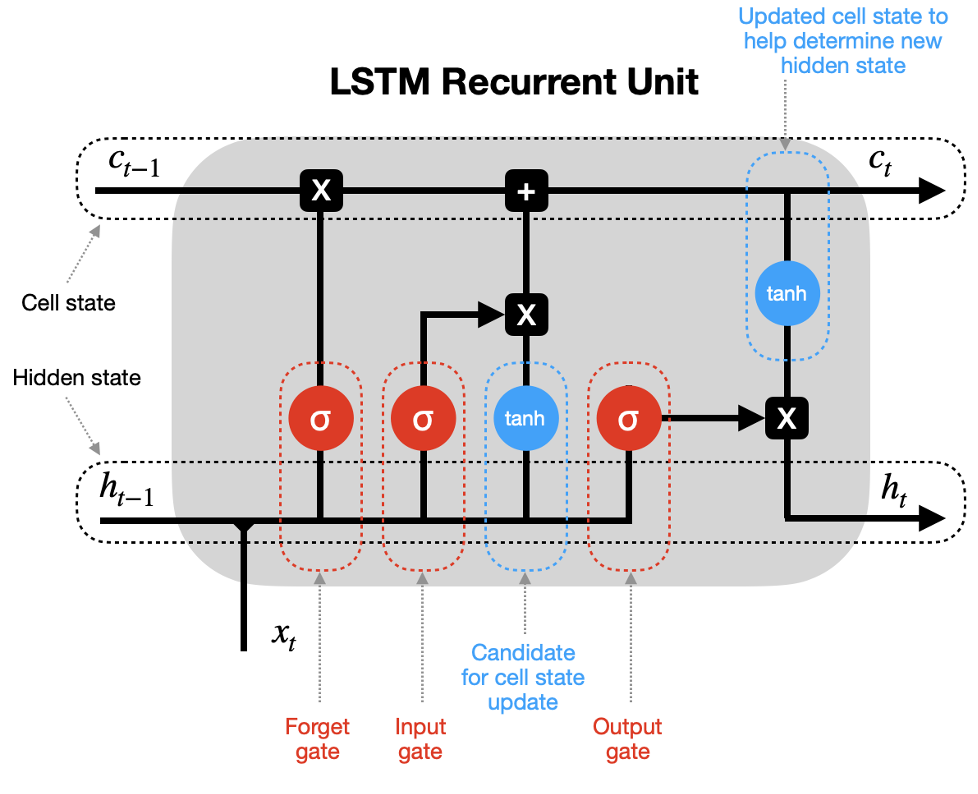

In [ ]:
out[-1, :, :]

tensor([[ 0.2291,  0.0526,  0.0014, -0.0145, -0.0063,  0.0246,  0.0295,  0.0661,
         -0.0098, -0.0719,  0.0900, -0.0329, -0.1268, -0.1123, -0.1048,  0.0315,
         -0.0125,  0.0457,  0.0133, -0.0225],
        [ 0.2763,  0.1898,  0.1074, -0.0620,  0.1199,  0.0906,  0.1466, -0.0660,
          0.1275, -0.0621,  0.0035, -0.0072, -0.0069, -0.2096, -0.0329, -0.0147,
          0.0968,  0.0507, -0.0866,  0.0509],
        [ 0.0091,  0.2161,  0.1298, -0.0894,  0.0308,  0.0345,  0.0497, -0.0765,
          0.2439,  0.0387,  0.0456,  0.1253,  0.0761, -0.2225, -0.1339, -0.0402,
          0.2504,  0.0300, -0.0917, -0.0615]], grad_fn=<SliceBackward0>)

In [ ]:
hidden[0, -1, :]

tensor([ 0.0091,  0.2161,  0.1298, -0.0894,  0.0308,  0.0345,  0.0497, -0.0765,
         0.2439,  0.0387,  0.0456,  0.1253,  0.0761, -0.2225, -0.1339, -0.0402,
         0.2504,  0.0300, -0.0917, -0.0615], grad_fn=<SliceBackward0>)

In [ ]:
cell[0, -1, :]

tensor([ 0.0158,  0.4835,  0.3505, -0.1970,  0.1048,  0.0601,  0.0899, -0.1866,
         0.4313,  0.0702,  0.0637,  0.2813,  0.1549, -0.3492, -0.2312, -0.1419,
         0.5157,  0.1234, -0.2486, -0.1493], grad_fn=<SliceBackward0>)

### GRU

In [ ]:
gru = nn.GRU(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
x = torch.randn(5, 3, 10)
out, hidden = gru(x)
print(out.shape, hidden.shape)

torch.Size([5, 3, 20]) torch.Size([2, 5, 20])


- out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size])

- hidden: 마지막 타임스텝의 은닉 상태 ([num_layers, batch_size, hidden_size])

## 시계열 데이터 실습

### 간단한 데이터 생성

우리는 간단한 사인 함수 데이터를 생성하여 시계열 예측을 진행합니다.

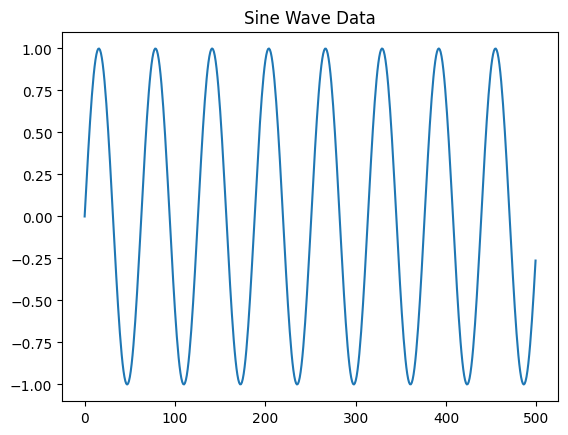

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sine_wave(seq_length, num_samples):
    x = np.linspace(0, seq_length, num_samples)
    y = np.sin(x)
    return y

# 데이터 생성 및 시각화
data = generate_sine_wave(seq_length=50, num_samples=500)
plt.plot(data)
plt.title("Sine Wave Data")
plt.show()

In [ ]:
import torch

# 시계열 데이터를 모델이 학습할 수 있도록 입력과 정답(label)로 변환하는 함수
def create_sequences(data, seq_length):
    sequences = []  # 입력 데이터 시퀀스를 저장할 리스트
    labels = []  # 정답 값을 저장할 리스트

    # 주어진 데이터에서 일정 길이(seq_length)만큼의 연속된 데이터를 입력 시퀀스로 만들고,
    # 해당 시퀀스 바로 다음 값(y값)을 정답으로 설정
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length]) # seq_length만큼의 데이터를 입력으로 사용
        labels.append(data[i+seq_length]) # 해당 시퀀스의 다음 값을 정답으로 설정

    # 리스트를 NumPy 배열로 변환 후 PyTorch 텐서로 변환
    sequences = torch.tensor(np.array(sequences), dtype=torch.float32).unsqueeze(-1)
    labels = torch.tensor(np.array(labels), dtype=torch.float32)

    return sequences, labels

seq_length = 50
X, y = create_sequences(data, seq_length)
print(X.shape, y.shape)  # 변환된 데이터의 크기 확인

torch.Size([450, 50, 1]) torch.Size([450])


In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x) # out: [450, 50, 20]
        ht = out[:, -1, :]   # ht:  [450, 20]
        return self.fc(ht)   # output: [450, 1]

In [ ]:
# out: 모든 타임스텝의 출력 ([batch_size, seq_len, hidden_size]) h1 h2 h3 .... ht -> ht

In [ ]:
# 데이터 생성 및 전처리
seq_length = 50
num_samples = 500
data = generate_sine_wave(seq_length, num_samples)
X, y = create_sequences(data, seq_length)

print(X.shape, y.shape)  # 변환된 데이터의 크기 확인

torch.Size([450, 50, 1]) torch.Size([450])


In [ ]:
# 모델 초기화
input_size = 1
hidden_size = 20
num_layers = 2
model = RNNModel(input_size, hidden_size, num_layers)

---

### 🧠 요약

| 단계 | 구성 요소         | 입력 텐서       | 출력 텐서       |
|------|------------------|------------------|------------------|
| 입력 | 시계열 데이터     | `[450, 50, 1]`   | -                |
| RNN Layer 1 | `nn.RNN(1, 20)` | `[450, 50, 1]`   | `[450, 50, 20]`  |
| RNN Layer 2 | `num_layers=2`  | `[450, 50, 20]`  | `[450, 50, 20]`  |
| 마지막 상태 선택 | `out[:, -1, :]` | `[450, 50, 20]`  | `[450, 20]`      |
| 출력층 | `Linear(20 → 1)` | `[450, 20]`      | `[450, 1]`       |

---

### 🔍 설명

- **배치 크기 450**: 450개의 독립된 시계열 샘플을 병렬 처리.
- **시퀀스 길이 50**: 각 시계열은 50개의 time step으로 구성됨.
- **입력 차원 1**: 단변량 시계열 (예: 온도, 주가 등).
- **RNN Layer**: 두 개의 계층으로 구성되어 시퀀스 정보를 단계적으로 추출.
- **Linear Layer**: 마지막 time step의 출력을 받아 스칼라 값으로 매핑.

---

In [ ]:
# 손실 함수 및 최적화 알고리즘
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch [0/100], Loss: 0.0028
Epoch [10/100], Loss: 0.0018
Epoch [20/100], Loss: 0.0015
Epoch [30/100], Loss: 0.0014
Epoch [40/100], Loss: 0.0013
Epoch [50/100], Loss: 0.0012
Epoch [60/100], Loss: 0.0012
Epoch [70/100], Loss: 0.0011
Epoch [80/100], Loss: 0.0010
Epoch [90/100], Loss: 0.0010
(450, 1)


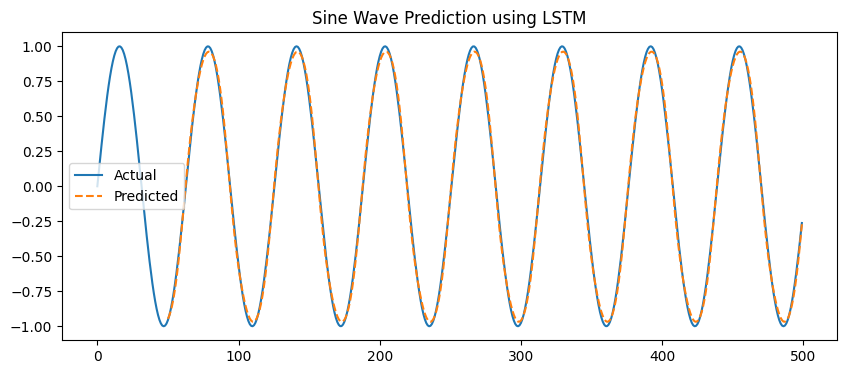

In [ ]:
# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs.squeeze(), y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

# 예측 및 시각화
model.eval()
with torch.no_grad():
    predictions = model(X).numpy()
    print(predictions.shape)

plt.figure(figsize=(10, 4))
plt.plot(data, label='Actual')
plt.plot(range(seq_length, seq_length + len(predictions)), predictions, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Sine Wave Prediction using LSTM")
plt.show()